# Data Science Workshop Project

###  Dean Ayalon, Yair Hadas, Eran Horowitz 

# Getting to know the data

### Importing necessary libraries and files:

In [1]:
from utils.plot_utils import *
from utils.table_utils import return_unique_values_of_column_from_table, filter_table_by_unique_ids, get_ads_per_feat
from paths import *

import numpy as np
import pandas as pd
import zipfile as zp
import sklearn.linear_model
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.grid_search
from utils.analysis_utils import *
pd.options.mode.chained_assignment = None # Eliminates some false warnings

# imports for drawing plots
%matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


## Introducing the Data

### Let's take a peek at our data:

In [2]:
#importing all tables (notice that all the globals are in paths.py):
z_tables = zp.ZipFile('tables.zip')
z_dataset_p1 = zp.ZipFile('dataset_p1.zip')
z_dataset_p2 = zp.ZipFile('dataset_p2.zip')
dataset = pd.concat([pd.read_csv(z_dataset_p1.open('final_dataset_p1.csv')),
                     pd.read_csv(z_dataset_p2.open('final_dataset_p2.csv'))],ignore_index=True)
clicks = pd.read_csv(z_tables.open(CLICKS))
doc_categories = pd.read_csv(z_tables.open(DOC_CATEGORIES))
doc_entities = pd.read_csv(z_tables.open(DOC_ENTITIES))
doc_meta = pd.read_csv(z_tables.open(DOC_META))
doc_topics = pd.read_csv(z_tables.open(DOC_TOPICS))
# Thw warning comes from events table. we will see later it is important.
events = pd.read_csv(z_tables.open(EVENTS))
page_views = pd.read_csv(z_tables.open(PAGE_VIEWS))
promoted = pd.read_csv(z_tables.open(PROMOTED_CONTENT))

C:\Users\Fun\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
clicks.head()

,display_id,ad_id,clicked
0,7,105766,1
1,7,215967,0
2,7,300808,0
3,106,14120,0
4,106,39897,0


In [9]:
doc_categories.head()

,document_id,category_id,confidence_level
0,1535812,1608,0.920000
1,1535812,1606,0.070000
2,1588025,1100,0.499594
3,1588025,1702,0.038013
4,1507172,1608,0.920000


In [10]:
doc_entities.head()

,document_id,entity_id,confidence_level
0,1535812,820d983b8113f61f046e13ccbb11d126,0.590491
1,1535812,768d8561cffe2fc2557a47eb02b57b44,0.565649
2,1535812,0b596c70c4d3e0a4f61f50938b1addd6,0.534612
3,1535812,0a732a0449ae2b29afe62402e48d08d8,0.516442
4,1535812,83604268da64cb0f54f23e126f8d47e8,0.366894


In [11]:
doc_meta.head()

,document_id,source_id,publisher_id,publish_time
0,1535812,1.0,603.0,2016-05-27 14:00:00
1,1588025,1.0,603.0,2016-06-10 00:00:00
2,1507172,1.0,603.0,2016-06-01 00:00:00
3,1513897,1.0,603.0,2016-05-25 11:00:00
4,1554398,1.0,603.0,2016-05-31 10:00:00


In [12]:
doc_topics.head()

,document_id,topic_id,confidence_level
0,1535812,113,0.127721
1,1535812,260,0.113370
2,1535812,249,0.068230
3,1535812,143,0.054044
4,1535812,84,0.046825


In [13]:
events.head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,7,2cc3f6457d16da,1149661,602,2,US>MT>762
1,106,36f0d66b583e3d,1788531,7873,2,US>NM>790
2,107,20b0db64279f06,1108855,7999,2,US
3,146,cc848dea324952,1320212,11062,1,CA>NS
4,170,b2778a037a571e,1773530,12840,1,US>TN>640


In [14]:
page_views.head()

,uuid,document_id,timestamp,platform,geo_location,traffic_source
0,a5f33d8cc582a0,1253,27358149,1,US>MD>512,2
1,299a24f6db003a,1253,57181539,2,ID>04,2
2,be5a78a9e86220,1253,40957699,1,US>FL>528,2
3,512aaf505db8e1,1253,64588114,2,SG>00,2
4,9246643d8f8412,1253,25973305,1,DE,1


In [15]:
promoted.head()

,ad_id,document_id,campaign_id,advertiser_id
0,7,12808,1,7
1,106,471509,12,19
2,107,471524,12,19
3,146,471497,34,19
4,170,20112,38,19


In [4]:
#This dataset was made in advance and is presented here for convenianc.
#Yet, along the notebook we recreate it as part of the work fluence.
#More information about Doc_id_x and Doc_id_y - in the documantation.
dataset.head()

,display_id,ad_id,clicked,document_id_x,is_morning,is_noon,is_afternoon,is_evening,is_night,platform_is_desktop,...,document_id_y,clicks_appearances_ratio,topic_sim,entities_sim,categories_sim,topic_popularity_conf,country_is_US,country_is_GB,country_is_CA,country_is_AU
0,7,105766,1,1149661,0.0,0.0,0.0,1.0,0.0,0,...,1151028,0.070000,0.008674,0.0,0.000000,0.070814,1,0,0,0
1,7,215967,0,1149661,0.0,0.0,0.0,1.0,0.0,0,...,1445187,0.108911,0.000000,0.0,0.000000,0.248187,1,0,0,0
2,7,300808,0,1149661,0.0,0.0,0.0,1.0,0.0,0,...,1701364,0.000000,0.002026,0.0,0.601944,0.040102,1,0,0,0
3,106,14120,0,1788531,0.0,0.0,0.0,1.0,0.0,0,...,700394,0.224138,0.000000,0.0,0.000000,0.208301,1,0,0,0
4,106,39897,0,1788531,0.0,0.0,0.0,1.0,0.0,0,...,900154,0.224090,0.000000,0.0,0.000000,0.075407,1,0,0,0


### preparing the main dataset

In [11]:
#This dataset will be build along the run of the notebook, for demonstration
#and "proof of concept" reasons.
b_dataset = dataset[["display_id","ad_id","clicked","document_id_x","document_id_y"]]

b_dataset.head()

,display_id,ad_id,clicked,document_id_x,document_id_y
0,7,105766,1,1149661,1151028
1,7,215967,0,1149661,1445187
2,7,300808,0,1149661,1701364
3,106,14120,0,1788531,700394
4,106,39897,0,1788531,900154


# Data Preparation

One of the main challenges we faced was deciding how to integrate the many tables contained in the data set to one comprehensive table on which we can run our models. It took us a while to understand the connections between them, and the meanings of the various features contained in each of them. The first stage was to understand what basic features we could rely on, that is, what features don't have large proportions of null values.

# Feature Extraction

## Click Time

It's reasonable to assume that people tend to click different ads when surfing at different times of day, so we wanted to factor the time each click happened into the model. The click timestamps provided were all UTC, so they didn't account for timezone differences between countries. At first we wanted to come up with a clever way of making this adjustment automatically for every single country in the data, but eventually settled on doing it manually.

Fortunately for us, some countries appear in the data a lot more than others. Let's look at the 10 most common:

C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


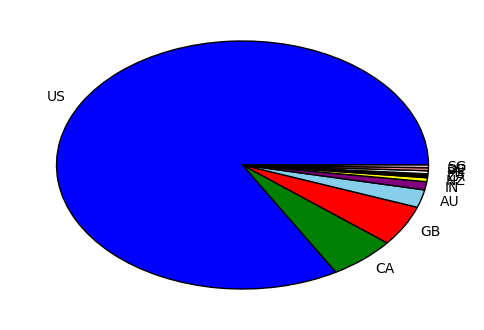

In [18]:
countries = data.geo_location.astype(str)
unique_countries_with_counts = np.unique(countries, return_counts=True)

unique_countries = unique_countries_with_counts[0]
counts = unique_countries_with_counts[1]

srt_idx = counts.argsort()[::-1]
counts = counts[srt_idx][:10]
unique_countries = unique_countries[srt_idx][:10]

colors = ['blue','green', 'red','skyblue','purple', 'yellow','black', 'white', 'lightcoral', 'pink']
fig = plt.figure()
plt.pie(counts, labels=unique_countries, colors = colors)
fig.show()

Four countries stand out: United States, Canada, Great Britain and Australia. Let's see just how much of the data originates from one of these countries:

In [21]:
top_4 = counts[:4]
float(sum(top_4)) / sum(counts)

0.96779125905953656

Almost 97% of the data is from one of those four countries, so we thought it's reasonable to apply timezone corrections only for events which originated from one of them (further details can be found in the documentation.

Finally, in order to input this factor into the model, we chose to "bin" each click event to one of 5 bins, based on its (timezone corrected) timestamp: "Morning" - 07:00 to 11:59, "Noon" - 12:00 to 15:59, "Afternoon" - 16:00 to 19:59, "Evening" - 20:00 to 23:59, "Night" - 00:00 to 06:59.

Let's see how the clicks spread across those bins:

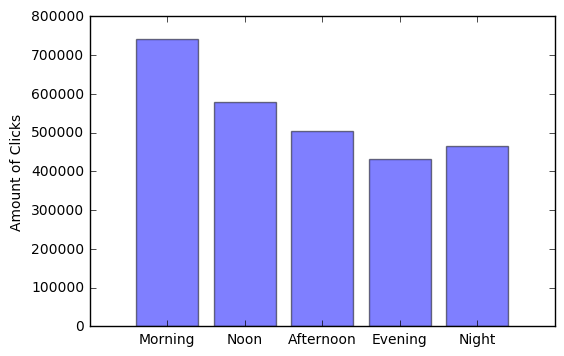

In [5]:
morning_clicks = sum(data.is_morning)
noon_clicks = sum(data.is_noon)
afternoon_clicks = sum(data.is_afternoon)
evening_clicks = sum(data.is_evening)
night_clicks = sum(data.is_night)

times = ["Morning", "Noon", "Afternoon", "Evening", "Night"]
click_amounts = [morning_clicks, noon_clicks, afternoon_clicks, evening_clicks, night_clicks]

plt.bar(range(5), click_amounts, align="center", alpha=0.5)
plt.xticks(range(5), times)
plt.ylabel("Amount of Clicks")
plt.show()

## Platforms

We wondered if the platform have an influence on probability of an ad to get clicked, we decided to check this by creating a binary feature from it.

In [8]:
# Extracting the platform vector and creating 3 boolean vectors based on it
platforms = events["platform"]
platform_is_desktop = np.array(platforms == 1, dtype=int)
platform_is_mobile = np.array(platforms == 2, dtype=int)
platform_is_tablet = np.array(platforms == 3, dtype=int)

# Creating the result Dataframe
binary_platform_frame = pd.DataFrame()
binary_platform_frame["display_id"] = events["display_id"]
binary_platform_frame["platform_is_desktop"] = platform_is_desktop
binary_platform_frame["platform_is_mobile"] = platform_is_mobile
binary_platform_frame["platform_is_tablet"] = platform_is_tablet

binary_platform_frame.head(10)

,display_id,platform_is_desktop,platform_is_mobile,platform_is_tablet
0,7,0,1,0
1,106,0,1,0
2,107,0,1,0
3,146,1,0,0
4,170,1,0,0
5,182,1,0,0
6,194,1,0,0
7,218,1,0,0
8,304,0,0,1
9,328,0,0,1


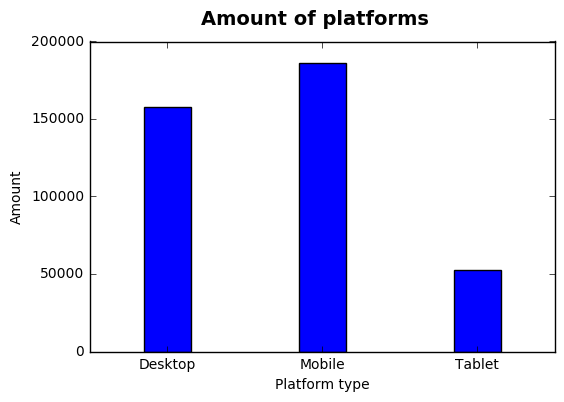

In [9]:
plot_platform_histogram(binary_platform_frame)

## Weekend Clicks

We expected the clicking trends to be different over the weekends - the data includes two of them: 18-19.6 and 25-26.6.
In order to include this in the model, we created a binary vector based on the click times. This time we dind't correct for timezone, mainly because when we did the results were actually worse.

In [ ]:
#TODO: right now this won't work because we need 'click_tstamp'. 
#after we will have it we will call it from the main_table.

# Extracting relevant columns from main table
table = main_table.groupby("display_id").first().reset_index()[["display_id", "click_tstamp"]]
timestamps = table["click_tstamp"]
# Initializing empty is_weekend array
is_weekend_boolean = np.zeros(shape=len(timestamps))

for i in range(len(timestamps)):
    # Format conversions to allow use of is_busday function
    as_datetime64 = np.datetime64(int(timestamps[i]), 's')
    as_datetime = pd.to_datetime(as_datetime64)

    # Using the is_busday to return an is_weekend boolean - True for Saturday and Sunday, False otherwise
    boolean = np.is_busday(as_datetime, weekmask='0000011')
    is_weekend_boolean[i] = boolean

# Creating result Dataframe with two columns - display_id and is_weekend
res_frame = pd.DataFrame()
res_frame["display_id"] = table["display_id"]
res_frame["is_weekend"] = is_weekend_boolean

## Ads per Display

bla bla bla

In [4]:
# Extracting the display_id's vector from main table
displays_and_ads = dataset[["display_id"]]

# Counting how many times every display_id appears in the vector - this equals the ad count per each display
ad_counts = displays_and_ads.groupby("display_id").display_id.agg("count")
ad_counts = pd.Series(ad_counts.as_matrix())

# Extracting vector of unique displays
displays = displays_and_ads["display_id"].unique()

# Creating result Dataframe, contaning the ad count for each display_id
# (has only display_id and ad_count columns)
disp_size_count = pd.DataFrame()
disp_size_count["display_id"] = displays
disp_size_count["ad_count_per_display"] = ad_counts.astype(int)

disp_size_count.head(10)

,display_id,ad_count_per_display
0,7,3
1,106,8
2,107,4
3,146,6
4,170,6
5,182,2
6,194,6
7,218,8
8,304,3
9,328,5


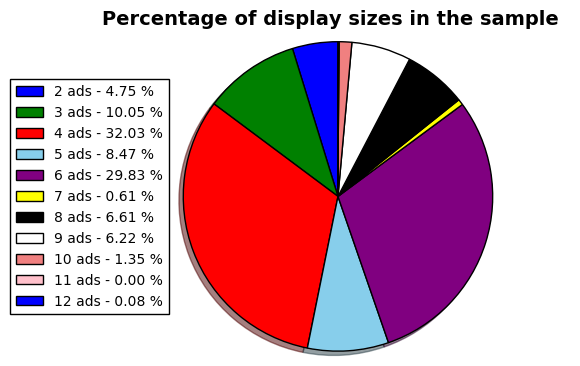

In [2]:
create_disp_number_piechart(dataset)

## Ads Per Advertiser and Ads Per Campaign

### Ads per advertiser

bla bla bla

In [11]:
#TODO: consider turn to/add ratio

# Loading the relevant tables
ad_advertisers = promoted[["ad_id", "advertiser_id"]]
# Counting the number of times an advertiser appeared:
ads_per_advertiser = promoted.groupby(["advertiser_id"], as_index=False).agg({"ad_id": np.count_nonzero})\
    .rename(index=str, columns={"ad_id": "ads_per_advertider"})
#advertiser_freq_per_ad = ad_advertisers.merge(ad_per_advertiser, on="advertiser_id")
#advertiser_freq_per_ad.drop(['advertiser_id'], axis=1, inplace=True)

ads_per_advertiser.head(10)

,advertiser_id,ads_per_advertider
0,3,1
1,4,12
2,5,1
3,7,3
4,8,10
5,9,8
6,10,1
7,12,3
8,13,24
9,14,14


### Ads per campaign

bla bla bla

In [12]:
#TODO: consider turn to/add ratio

# Loading the relevant tables
ad_campaigns = promoted[["ad_id", "campaign_id"]]
# Counting the number of times an advertiser appeared:
ad_per_campaign = ad_campaigns.groupby(["campaign_id"], as_index=False).agg({"ad_id": np.count_nonzero})\
    .rename(index=str, columns={"ad_id": "ads_per_campaign"})
#campaign_freq_per_ad = ad_campaigns.merge(ad_per_campaign, on="campaign_id", copy=False)
#campaign_freq_per_ad.drop(['campaign_id'], axis=1, inplace=True)

ad_per_campaign.head(10)


,campaign_id,ads_per_campaign
0,1,1
1,2,2
2,4,9
3,7,1
4,12,2
5,14,5
6,16,1
7,20,1
8,23,1
9,25,1


### bar charts - Advertisers/Campaigns popularity

bla bla about bar charts

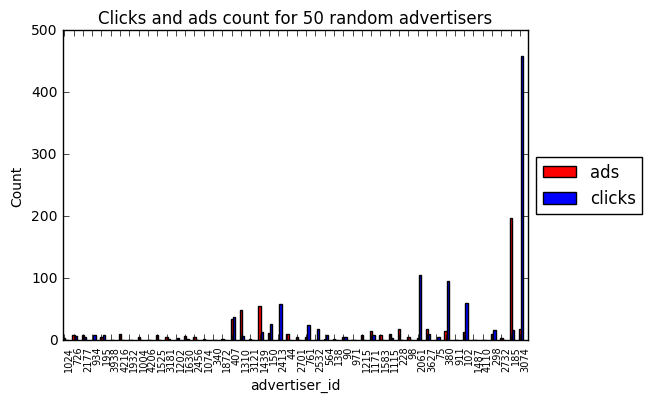

In [15]:
#TODO: since now it's made from the filtered tables, consider some improvement like pick different RandomState
create_advertiser_or_campaign_pop_histogram(dataset,promoted,"advertiser_id",
                                            "Clicks and ads count for 50 random advertisers")

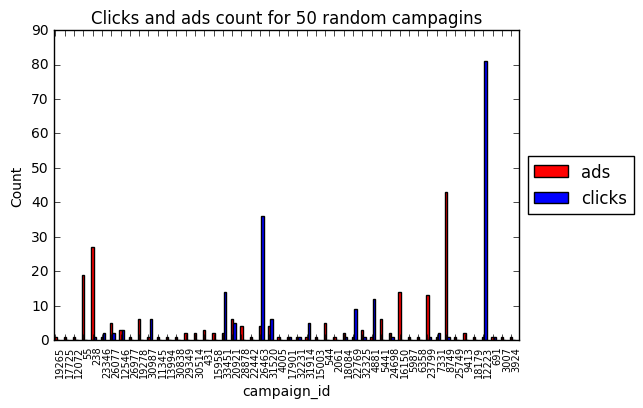

In [14]:
create_advertiser_or_campaign_pop_histogram(dataset,promoted,"campaign_id",
                                            "Clicks and ads count for 50 random campagins")

## CTR - Click Through Ratio

In [16]:
# Slicing only necessary columns
table = dataset[["ad_id", "clicked"]]
# Calculating clicks/appearances ratio
click_ratio_frame = table.groupby("ad_id").clicked.agg(["mean"]).reset_index()

click_ratio_frame.rename(index=str, columns={"mean": "clicks_appearances_ratio"}, inplace=True)

click_ratio_frame.head(10)

,ad_id,clicks_appearances_ratio
0,2,0.000000
1,3,0.000000
2,4,0.000000
3,7,0.281818
4,8,0.000000
5,10,0.000000
6,12,0.000000
7,13,0.000000
8,21,0.000000
9,27,0.000000


The following histograms represent the amount of time an ad appeared and the amount of clicks it got. It can be seen beautifuly in the eye that the behavor of both histograms is very similiar, and that implies of the strong relation between those features.  

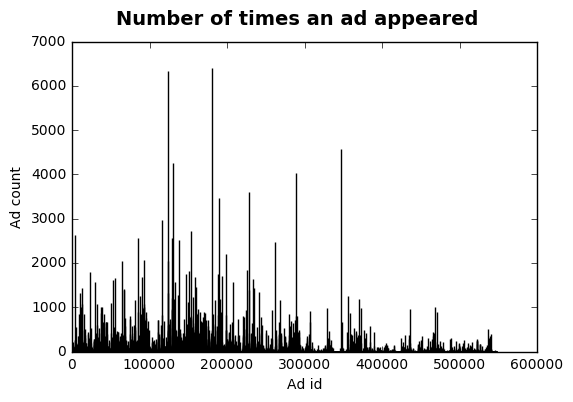

In [2]:
#adding ad appearnce histogram
create_ads_clicks_histogram(dataset,create_ad_appearance = True)

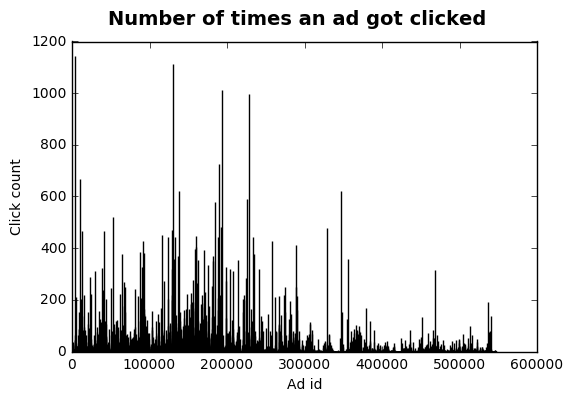

In [3]:
#adding ad clicks histogram
create_ads_clicks_histogram(dataset)

## Similarities - Do users tend to move to similiar topics?

We were wondering if users tend to click on ads that are close related to the topic of the article they just read. later we expended this thesis for enteties and categories as well.

In [14]:
# Multi-purpose function used to extract similarity metrics for document topics, entities and categories
def find_similarity(table, doc_out, doc_in, field):
    # Extracting all data relevant to doc_out
    out_frame = table[table.document_id == doc_out]
    out_items = np.array(out_frame[field])
    out_conf = np.array(out_frame.confidence_level)

    # Extracting all data relevant to doc_in
    in_frame = table[table.document_id == doc_in]
    in_items = np.array(in_frame[field])
    in_conf = np.array(in_frame.confidence_level)

    # Computing requested similarity by multiplying conf levels of shared topics/entities/categories
    similarity = 0
    for out_index in range(len(out_items)):
        item = out_items[out_index]
        if item in in_items:
            in_index = np.argwhere(in_items == item)[0][0]
            s1 = out_conf[out_index]
            s2 = in_conf[in_index]
            similarity += s1*s2
    return similarity

In [ ]:
#this code takes a long time to run it is not recommended to run it.
n = len(dataset)
topic_similarities = np.zeros(n)
entities_similarities = np.zeros(n)
categories_similarities = np.zeros(n)
counter = 0

#runs on each row in the data set and calculates it's similarity
for row in dataset.itertuples():
    if not counter % n/100:
        print("Adding similarity features: passed through " + (str(round(counter * 100 / n))) + "% of rows")
    doc_out = row.document_id_x
    doc_in = row.document_id_y

    topic_similarity = find_similarity(doc_topics, doc_out, doc_in, "topic_id")
    topic_similarities[counter] = topic_similarity

    categories_similarity = find_similarity(doc_categories, doc_out, doc_in, "category_id")
    categories_similarities[counter] = categories_similarity

    entities_similarity = find_similarity(doc_entities, doc_out, doc_in, "entity_id")
    entities_similarities[counter] = entities_similarity

    counter += 1

# Creating the final table
similarities = pd.DataFrame(dataset[['ad_id']])
similarities["topic_sim"] = topic_similarities
similarities["entities_sim"] = entities_similarities
similarities["categories_sim"] = categories_similarities

similarities.head(10)

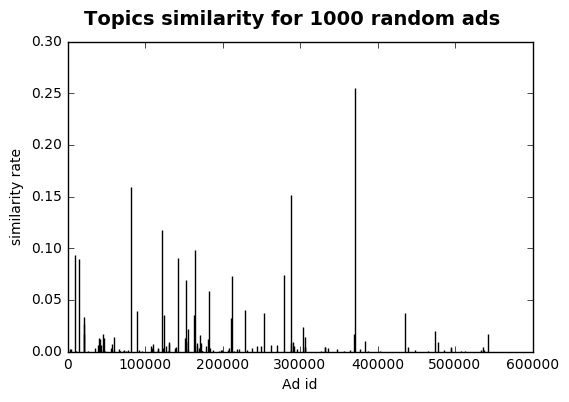

In [7]:
create_similarity_histograms(dataset,1000,"topic_sim","Topics")

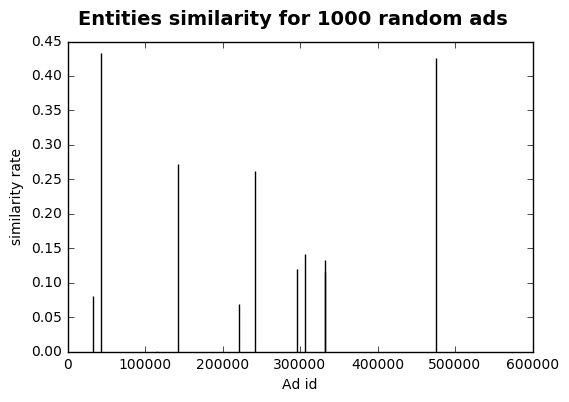

In [4]:
create_similarity_histograms(dataset,1000,"entities_sim","Entities")

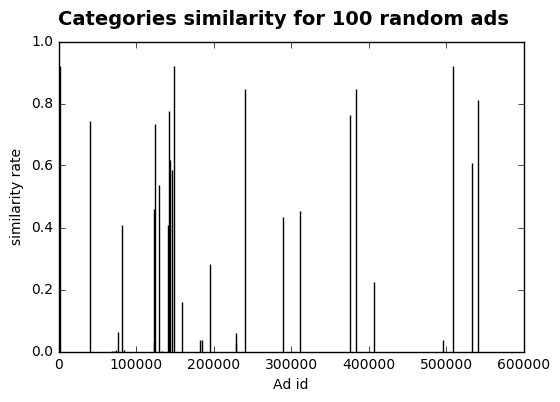

In [5]:
create_similarity_histograms(dataset,100,"categories_sim","Categories")

# Analysis - trying to predict!

### First Attempt: Logistic Regression

The first run we made used logistic regression, and only the similarity features.

Let's see how far that got us:

In [3]:
features = ["topic_sim", "entities_sim", "categories_sim"]
for feature in features:
    data[feature] = sklearn.preprocessing.scale(data[feature])
    
# Splitting to train (80%) and test (20%) sets
train_data, test_data = split_to_test_and_train(data)

train_features_list = [train_data[feature] for feature in features]
test_features_list = [test_data[feature] for feature in features]

# Extracting X and y vectors for train and test
train_points, train_labels = prepare_dataset_for_model(train_features_list, train_data.clicked)
test_points, test_labels = prepare_dataset_for_model(test_features_list, test_data.clicked)

model = sklearn.linear_model.LogisticRegression()
model.fit(train_points, train_labels)

display_probs = model.predict_proba(test_points)[:, 1]
test_data["probability_of_click"] = display_probs

# Evaluating the model using 0/1 loss
zero_one_accuracy = accuracy_zero_one_loss(test_data)
print("0/1 Accuracy for Logistic Regression Model: " + str(zero_one_accuracy))

# Evaluating the model using MAP@12 metric
map12_accuracy = MAP12_Accuracy(test_data)
print("MAP@12 Accuracy for Logistic Regression Model: " + str(map12_accuracy))


0/1 Accuracy for Logistic Regression Model: 0.262509725042
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Logistic Regression Model: 0.503027275956


This was obviously far from good, as even simple single-feature models could acheive much better results. At this point we came to the realisation we needed a lot more features - so we spent a sizeable amount of time thinking about and generating all the features mentioned above.

### Second Attempt: More Features, Gradient Boosting and Random Forest

We then wanted to check whether logistic regression's performance has improved, and also check whether there are better models we can use. A lot of other teams used gradient boosting and random forests, so we decided to check them as well and compare them to logistic regression.

In [4]:
features = ["topic_sim", "entities_sim", "categories_sim",
            "is_morning", "is_noon", "is_afternoon", "is_evening", "is_night",
            "is_weekend", "platform_is_mobile", "platform_is_desktop", "platform_is_tablet",
            "clicks_appearances_ratio", "ad_count_per_display", "ads_per_advertiser",
            "ads_per_campaign"]

features_to_scale = ["topic_sim", "entities_sim", "categories_sim",
                     "clicks_appearances_ratio", "ad_count_per_display",
                     "ads_per_advertiser", "ads_per_campaign"]

for feature in features_to_scale:
    data[feature] = data[feature].astype(float)  # Avoids scaling conversion warnings for ints
    data[feature] = sklearn.preprocessing.scale(data[feature])
    
train_features_list = [train_data[feature] for feature in features]
test_features_list = [test_data[feature] for feature in features]

# Extracting X and y vectors for train and test
train_points, train_labels = prepare_dataset_for_model(train_features_list, train_data.clicked)
test_points, test_labels = prepare_dataset_for_model(test_features_list, test_data.clicked)
    
models = [sklearn.linear_model.LogisticRegression(),
         sklearn.ensemble.GradientBoostingClassifier(),
         sklearn.ensemble.RandomForestClassifier()]

model_names = ["Logistic Regression", "Gradient Boosting", "Random Forest"]

map_12_accuracies = np.zeros(shape=3)
zero_one_accuracies = np.zeros(shape=3)

for i in range(len(models)):
    model = models[i]
    print("Now checking " + model_names[i])
    model.fit(train_points, train_labels)
    display_probs = model.predict_proba(test_points)[:, 1]
    test_data["probability_of_click"] = display_probs
    zero_one_accuracies[i] = accuracy_zero_one_loss(test_data)
    map_12_accuracies[i] = MAP12_Accuracy(test_data)
    

Now checking Logistic Regression
Now calculating MAP@12 accuracy, should take about 5 minutes
Now checking Gradient Boosting
Now calculating MAP@12 accuracy, should take about 5 minutes
Now checking Random Forest
Now calculating MAP@12 accuracy, should take about 5 minutes


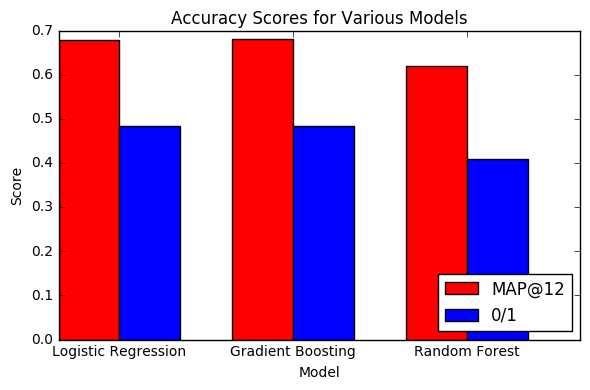

                 Model  MAP@12 Accuracy  0/1 Accuracy
0  Logistic Regression         0.679273      0.483539
1    Gradient Boosting         0.680010      0.484392
2        Random Forest         0.619916      0.408290


In [5]:
# Plotting the scores
fig = plt.figure()
plt.bar(range(3), map_12_accuracies, 0.35, color='r', label="MAP@12")
plt.bar(np.array(range(3)) + 0.35, zero_one_accuracies, 0.35, color='b', label="0/1")
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy Scores for Various Models')
plt.xticks(np.array(range(3)) + 0.35, ("Logistic Regression", "Gradient Boosting", "Random Forest"))
plt.legend(loc = 4)
plt.tight_layout()
plt.show()
    
acc_frame = pd.DataFrame()
acc_frame["Model"] = model_names
acc_frame["MAP@12 Accuracy"] = map_12_accuracies
acc_frame["0/1 Accuracy"] = zero_one_accuracies

print(acc_frame)

Now we needed to decide which model to work with.
Clearly, random forest is inferior to the other two models, so we decided not to pursue it further.  
Let's see how far we can improve each of the remaining models using cross validation to tune their parameters.

In [6]:
# Using CV to tune LR's C parameter and penalty type
model = sklearn.linear_model.LogisticRegression(verbose=True)
parameters = {"C": [10**-5, 1, 10, 100, 1000], "penalty": ["l1","l2"]}
cv = sklearn.grid_search.GridSearchCV(model, parameters, verbose=True)
cv.fit(train_points,train_labels)

base_param_grid = cv.grid_scores_
C_values = np.array([10**-5, 1, 10, 100, 1000])
validation_scores = np.zeros(shape=len(base_param_grid))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.4min finished


[LibLinear]

C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


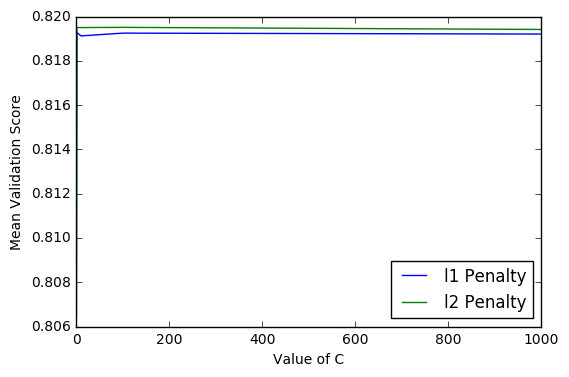

In [7]:
# Plotting the scores
l1_accuracies = []
l2_accuracies = []
for i in range(len(base_param_grid)):
    penalty = base_param_grid[i].parameters['penalty']
    accuracy = base_param_grid[i].mean_validation_score
    if penalty == 'l1':
        l1_accuracies.append(accuracy)
    else:
        l2_accuracies.append(accuracy)
        
fig = plt.figure()
plt.plot(C_values, l1_accuracies, label="l1 Penalty")
plt.plot(C_values, l2_accuracies, label="l2 Penalty")
plt.xlabel("Value of C")
plt.ylabel("Mean Validation Score")
plt.legend(loc = 4)
fig.show()

As we can see, using l2 penalty does give a bit of an improvement, but changing C has little impact. Let's see the MAP@12 score of the best logistic regression model:

In [10]:
model = cv.best_estimator_
model.fit(train_points, train_labels)
display_probs = model.predict_proba(test_points)[:, 1]
test_data["probability_of_click"] = display_probs
zero_one_accuracy = accuracy_zero_one_loss(test_data)
map_12_accuracy = MAP12_Accuracy(test_data)

print("0/1 Accuracy for best LR model is " + str(zero_one_accuracy))
print("MAP@12 Accuracy for best LR model is " + str(map_12_accuracy))

[LibLinear]Now calculating MAP@12 accuracy, should take about 5 minutes
0/1 Accuracy for best LR model is 0.48353858707
MAP@12 Accuracy for best LR model is 0.679276142446


So even with optimized parameters, LR still acheives less than the Gradient Boosting model.
Let's now try optimizing GB:

In [12]:
skip_computation = True

if not skip_computation:
    model = sklearn.ensemble.GradientBoostingClassifier()
    parameters = {"max_depth": [2, 3, 4, 5, 6]}
    cv = sklearn.grid_search.GridSearchCV(model, parameters, verbose=True)
    cv.fit(train_points,train_labels)
    model = cv.best_estimator
    
else:
    model = sklearn.ensemble.GradientBoostingClassifier(max_depth=6)

C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


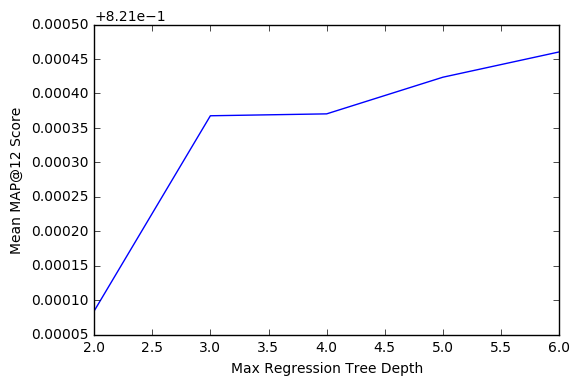

In [25]:
# Plotting the scores (Impossible if skipped computation in previous cell)
base_param_grid = cv.grid_scores_
max_depth_values = np.array([2, 3, 4, 5, 6])
validation_scores = np.zeros(shape=len(base_param_grid))
for i in range(5):
    validation_scores[i] = base_param_grid[i].mean_validation_score
    
fig = plt.figure()
plt.plot(max_depth_values, validation_scores)
plt.xlabel("Max Regression Tree Depth")
plt.ylabel("Mean MAP@12 Score")
fig.show()

It seems enlarging the maximum depth for the regression trees does make a difference. We chose to stick to a max depth of 6 - increasing it further will probably improve the results slightly, but at the expense of much longer running time.

Now let's perform the final test for our model. Coincidentally, the number of displays in the data is divisible by 7, so we can perform 7-fold cross validation to make final evaluation of our model. 

In [13]:
displays = data.display_id.unique()
np.random.RandomState(0).shuffle(displays)

# Performing 7-fold CV - each fold takes about 45 minutes
zero_one_accuracies = np.zeros(shape=7)
map_12_accuracies = np.zeros(shape=7)

for i in range(7):
    print("Now working on fold number " + str(i+1))
    test_displays = displays[i*75333:(i+1)*75333]
    if i == 0:
        train_displays = displays[75333:]
    elif i == 6:
        train_displays = displays[:6*75333]
    else:
        train_displays = np.concatenate((displays[:i*75333], displays[(i+1)*75333:]))

    train_df = data[data.display_id.isin(train_displays)]
    test_df = data[data.display_id.isin(test_displays)]

    train_features_list = [train_df[feature] for feature in features]
    test_features_list = [test_df[feature] for feature in features]

    # Extracting X and y vectors for train and test
    train_points, train_labels = prepare_dataset_for_model(train_features_list, train_df.clicked)
    test_points, test_labels = prepare_dataset_for_model(test_features_list, test_df.clicked)

    model.fit(train_points, train_labels)

    display_probs = model.predict_proba(test_points)[:, 1]
    test_df["probability_of_click"] = display_probs  # Error generated at this line can be ignored

    # Evaluating the model using 0/1 loss
    zero_one_accuracy = accuracy_zero_one_loss(test_df)
    zero_one_accuracies[i] = zero_one_accuracy
    print("0/1 Accuracy for Gradient Boosting Algorithm: " + str(zero_one_accuracy))

    # Evaluating the model using MAP@12 metric
    map12_accuracy = MAP12_Accuracy(test_df)
    map_12_accuracies[i] = map12_accuracy
    print("MAP@12 Accuracy for Gradient Boosting Algorithm: " + str(map12_accuracy))

print("Mean 0-1 Accuracy: " + str(zero_one_accuracies.mean()))
print("Mean Map@12 Accuracy: " + str(map_12_accuracies.mean()))

Now working on fold number 0
0/1 Accuracy for Gradient Boosting Algorithm: 0.485338430701
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Gradient Boosting Algorithm: 0.681125048172
Now working on fold number 1
0/1 Accuracy for Gradient Boosting Algorithm: 0.485749936947
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Gradient Boosting Algorithm: 0.681486450281
Now working on fold number 2
0/1 Accuracy for Gradient Boosting Algorithm: 0.484196832729
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Gradient Boosting Algorithm: 0.680335095725
Now working on fold number 3
0/1 Accuracy for Gradient Boosting Algorithm: 0.483838424064
Now calculating MAP@12 accuracy, should take about 5 minutes
MAP@12 Accuracy for Gradient Boosting Algorithm: 0.679758259571
Now working on fold number 4
0/1 Accuracy for Gradient Boosting Algorithm: 0.48456851579
Now calculating MAP@12 accuracy, should take about 

Final MAP@12 Score: 0.68054 (+/- 0.00127)


C:\Users\Dean\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


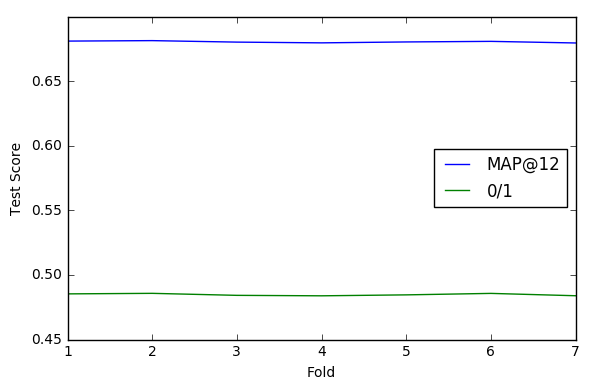

In [14]:
fig = plt.figure()
plt.plot(range(1,8), map_12_accuracies, label="MAP@12")
plt.plot(range(1,8), zero_one_accuracies, label="0/1")
plt.xlabel("Fold")
plt.ylabel("Test Score")
plt.legend(loc = 7)
plt.tight_layout()
fig.show()

print("Final MAP@12 Score: %0.5f (+/- %0.5f)" % (map_12_accuracies.mean(), map_12_accuracies.std() * 2))

As we can see in the graph and in the accuracy printout, the model we managed to build is quite stable - the score hardly changes for the different folds.

Our model acheives a CV score of 0.68054. For comparison, the top team got a score of 0.70145, and the 50th best got a score of 0.67945. 

### Which features were critical?

In [33]:
sorted_idx = model.feature_importances_.argsort()
np_features = np.array(features)
np.dstack((np_features[sorted_idx], model.feature_importances_[sorted_idx]))

array([[['is_morning', '0.0037687279055567476'],
        ['is_evening', '0.003769759921776365'],
        ['platform_is_tablet', '0.004201588862971547'],
        ['is_afternoon', '0.004513986794684371'],
        ['is_weekend', '0.006349296243304731'],
        ['is_noon', '0.007866212214231729'],
        ['is_night', '0.010003846815475918'],
        ['platform_is_desktop', '0.01575905365384877'],
        ['platform_is_mobile', '0.02020110259425708'],
        ['entities_sim', '0.046252656885646865'],
        ['ads_per_campaign', '0.0751049818981624'],
        ['topic_sim', '0.08737791185271787'],
        ['ad_count_per_display', '0.09086074124098768'],
        ['categories_sim', '0.0949009165790298'],
        ['ads_per_advertiser', '0.12878253771112577'],
        ['clicks_appearances_ratio', '0.4002866788262222']]], 
      dtype='<U32')

As expected, the clicks/appearances ratio was the most important feature, followed by the number of ads per advertiser. The most important similarity feature turned out to be the one for categories.

# Can we improve even more??

## adding new features:

### Does the popularity of a topic effects on the click?

In [3]:
#Clicks per topic:

relevant_ads_and_docs = dataset[["document_id_y", "ad_id", "clicked"]]\
    .rename(index=str, columns={"document_id_y": "document_id"})

#merge them with document_topics
relevant_ads_docs_and_topics = relevant_ads_and_docs.merge(doc_topics, on='document_id')

#count the amount of clicks
clicks_per_topic = relevant_ads_docs_and_topics.groupby(["topic_id"], as_index=False).agg({"clicked": np.sum})\
    .rename(index=str, columns={'clicked': 'clicks_No'})

clicks_per_topic.head()
        

,topic_id,clicks_No
0,0,4764
1,1,4179
2,2,4090
3,3,1188
4,4,1124


In [4]:
#Documents per topic
#for each topic count the amount of docs he has.
docs_per_topic = doc_topics.groupby(["topic_id"], as_index=False).agg({"document_id": np.count_nonzero})\
    .rename(index=str, columns={"document_id": "doc_No"})
    
#Now we calculate the clicks-docs ratio with regard to the confidence.
#merge the two relations we have creates previously
topic_popularity = relevant_ads_docs_and_topics.merge(clicks_per_topic, on="topic_id")\
                         .merge(docs_per_topic, on="topic_id")

topic_popularity['topic_popularity_conf'] = \
    (topic_popularity['clicks_No']*topic_popularity['confidence_level'])/topic_popularity['doc_No']

#drop unnecessary columns and duclicated rows and sum the whole values we got for each ad (since an ad can have different topics)
topic_popularity = topic_popularity.drop_duplicates()
topic_popularity.drop(['clicked', 'document_id', 'topic_id', 'confidence_level', 'clicks_No', 'doc_No'],
                      axis=1, inplace=True)
topic_popularity = topic_popularity.groupby(["ad_id"], as_index=False).agg({"topic_popularity_conf": np.sum})

topic_popularity.head()

,ad_id,topic_popularity_conf
0,2,2.292632
1,3,2.046422
2,4,2.373272
3,7,3.223190
4,8,1.322284


### Representative bar chart:

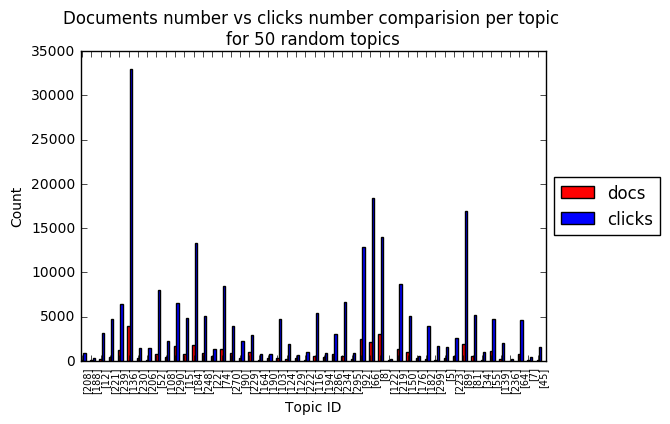

In [9]:
top_no = 50
indexes = np.random.RandomState(0).permutation(len(docs_per_topic))[:top_no]
topic_ids = np.array(docs_per_topic[["topic_id"]])[indexes]
doc_No = np.array(docs_per_topic[["doc_No"]])[indexes]
clicks = np.array(clicks_per_topic[["clicks_No"]])[indexes]

create_two_bars_histogram(top_no,doc_No,clicks,topic_ids,
                          "Documents number vs clicks number comparision per topic \n"
                          "for 50 random topics",
                          'Topic ID','Count','docs')

In [12]:
#adding feature to dataset:
b_dataset = b_dataset.merge(topic_popularity, on="ad_id",how="left")

#do we have Nan values? how much?
Nan_No = b_dataset.topic_popularity_conf.isnull().sum()
print("There are {:d} Nan values Which are {:.2f}% from the whole data"\
      .format(Nan_No,Nan_No/len(b_dataset)))

There are 27867 Nan values Which are 0.01% from the whole data


In [13]:
#completing the missing values with the median values:
b_dataset.topic_popularity_conf = b_dataset.topic_popularity_conf\
    .fillna(b_dataset.topic_popularity_conf.median())

#check that this worked
print("Now there are {:d} Nan values :)"\
      .format(b_dataset.topic_popularity_conf.isnull().sum()))


Now there are 0 Nan values :)


In [14]:
b_dataset.head()

,display_id,ad_id,clicked,document_id_x,document_id_y,topic_popularity_conf
0,7,105766,1,1149661,1151028,3.118160
1,7,215967,0,1149661,1445187,7.203928
2,7,300808,0,1149661,1701364,1.457516
3,106,14120,0,1788531,700394,6.582609
4,106,39897,0,1788531,900154,2.536574


### let's take the countries in account too!

# In conclusion

In this project we tried to give the best prediction we could for the chance of an ad in a display to get clicked.
we discovered that the strongest feature required for the predicton is the obvious one - the simple relation between the number of time an ad appeared, and the number of times it got click.
Yet the hard work, as we learned from the discussions in Kaggle.com (and also on our flesh), is to improve the accuracy even more - and to do that we were requaired to think hard on meaningful features to extract from the data, and also choose the most accurate model to predict with.
Since we got to 68.??% accuracy, we believe we have done a decent job (for comparation, this accuracy puts us in the 50 first place between 400 teams. the team who won the competition got 71.??% accuracy).

<b> probably isn't finished </b>